A rocket has to clear a wall that is 855 meters high, 28 meters away
Success
 


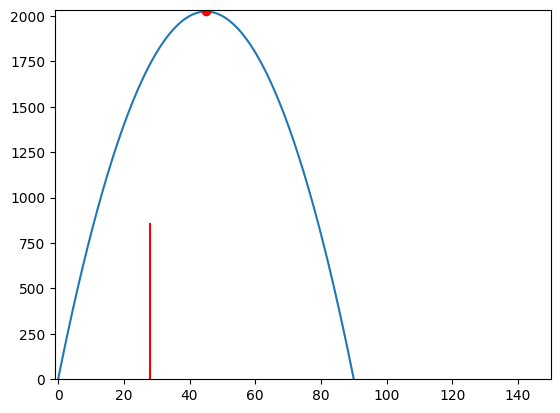

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

def func(a, b, c, x):
    return a * x**2 + b * x + c

loc = random.randint(1, 100)
loch = random.randint(1, 1000)
print(f"A rocket has to clear a wall that is {loch} meters high, {loc} meters away")

a = -1
b = float(input("Initial velocity (m/s) = "))
c = 0

# Change vx and vy to represent the vertex
vx = -b / (2 * a)
vy = a * vx**2 + b * vx + c

# Also change the following dimensions to display the vertex
xmin = -1
xmax = 150
ymin = -1
ymax = max(loch, int(vy)) + 10

points = 2 * (xmax - xmin)
x = np.linspace(xmin, xmax, points)
y = func(a, b, c, x)

fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # window size

plt.plot([loc, loc], [0, loch], "r")  # wall
plt.plot(x, y)  # plot the line for the equation
plt.plot([vx], [vy], "ro")  # plot the vertex point

root_sq = round((-b - math.sqrt(b**2 - 4 * a * c)) / (2 * a), 2)

if func(a, b, c, loc) >= loch and root_sq >= loc: # must fly past wall
    print("Success")
else:
    print("Missed")

print(" ")
plt.show()